In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


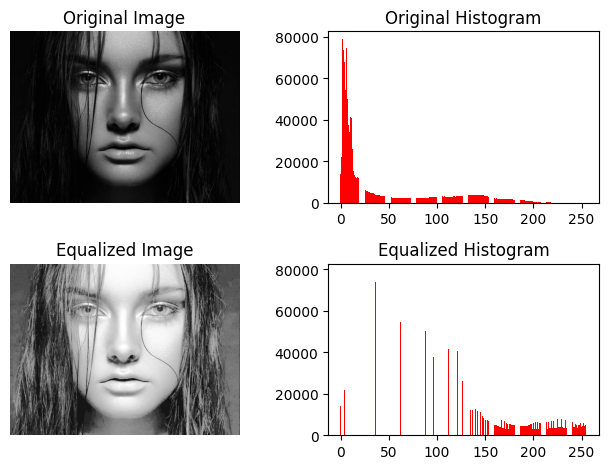

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def histogram_equalization(image):
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    histogram = np.zeros(256, dtype=np.float32)
    for pixel in img.ravel():
      histogram[pixel] += 1

    cdf = np.zeros_like(histogram, dtype=np.float64)
    cdf[0] = histogram[0]
    for i in range(1, len(histogram)):
        cdf[i] = cdf[i - 1] + histogram[i]
        
    plt.subplot(2, 2, 2)
    plt.bar(range(256), histogram.ravel(), color='red')
    plt.title('Original Histogram')

    pdf = histogram/ np.sum(histogram)

    cdf = pdf.cumsum()

    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
   
    cdf_normalized = cdf_normalized.astype('uint8')
    
    equalizedImage = cdf_normalized[image]

    plt.subplot(2, 2, 3)
    plt.imshow(equalizedImage, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    hist = cv.calcHist([equalizedImage], [0], None, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.bar(range(256), hist.ravel(), color='red')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

img = cv.imread("girl.jpeg", cv.IMREAD_GRAYSCALE)
histogram_equalization(img)
